# pandas

Сегодня мы:
- познакомимся с библиотекой `pandas`
- проведем анализ данных с помощью нее
- построим график с помощью библиотеки `matplotlib`

![](https://drive.google.com/uc?id=13Vc8dLygbSncsAsIYvbsGQkm6Q-Bo9jQ)

- документация: http://pandas.pydata.org/pandas-docs/stable/
- 10 minutes to pandas: https://pandas.pydata.org/pandas-docs/stable/10min.html
- Pandas Tutorial: DataFrames in Python: https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
- Cheet Sheet: https://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/
- Visualization: http://pandas.pydata.org/pandas-docs/stable/visualization.html

In [0]:
# скачиваем файл
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1cq9JDz8-zwzoGL6udiT_ogHHRWdnsd1q' -O math_students.csv

Будем работать с данными, собранными благодаря опросу студентов математического курса средней школы в Португалии (возраст - от 15 до 22 лет). Они находятся в файле "math_students.csv". Целевой переменной является итоговая оценка студента за курс.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# функция, позволяющая выводить графики прямо в ноутбук
%matplotlib inline

Загрузим данные и посмотрим на них.

In [4]:
# если данные и ноутбук находятся в разных папках, то для загрузки файла помимо названия необходимо также прописать путь к нему
# .csv - текстовый файл для представления табличных данных, разделенных каким-то символом. В данном случае - запятой
data = pd.read_csv('math_students.csv', delimiter=',')

# функция .head(n) выводит первые n строк таблицы (по умолчанию n=5)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Аналогично, можно смотреть не на верхние строки таблицы, а на нижние:

In [8]:
data.tail(7)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
388,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,0,7,9,8
389,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,0,6,5,0
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


В данном случае объектами являются студенты, признаками - различные их характеристики. Найдем число и тех, и других:

In [0]:
data.shape

(395, 33)

Итак, всего объектов 395, а признаков - 32 (учитываем, что один из столбцов - это целевая переменная). Все признаки имеют разную природу. Вот их более подробная расшифровка:

 - school - тип школы ("GP" - Gabriel Pereira или "MS" - Mousinho da Silveira)
 - sex - пол ("F" - female или "M" - male)
 - age - возраст (от 15 до 22)
 - address - откуда студент ("U" - urban или "R" - rural)
 - famsize - размер семьи ("LE3" - меньше или равно 3 или "GT3" - больше 3)
 - Pstatus - в каких отношениях родители ("T" - живут вместе "A" - раздельно)
 - Medu - образование матери (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Fedu - образование отца (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Mjob - работа матери ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - Fjob - работа отца ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - reason - причина выбора школы (близко к дому — "home", репутация школы — "reputation", предпочтение некоторым предметам - "course" или "other")
 - guardian - опекун ("mother", "father" или "other")
 - traveltime - время от дома до школы (1 - меньше 15 мин., 2 - 15 до 30 мин., 3 - 30 мин. до 1 часа, или 4 - больше 1 часа)
 - studytime - количество часов обучения в неделю (1 - меньше 2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, или 4 - больше 10 часов)
 - failures - количество ранее не сданных предметов (n if 1 <= n < 3, else 4)
 - schoolsup - дополнительные занятия (yes or no)
 - famsup - помощь от семьи при выполнении заданий (yes or no)
 - paid - дополнительные платные занятия (yes or no)
 - activities - внеклассная деятельность (yes or no)
 - nursery - посещал детский сад (yes or no)
 - higher - желание высшего образования (yes or no)
 - internet - домашний интернет (yes or no)
 - romantic - состоит в романтических отношениях (yes or no)
 - famrel - насколько хороши отношения в семье (от 1 - очень плохие до 5 - превосходные)
 - freetime - наличие свободного времени после школы (от 1 - очень мало до 5 - очень много)
 - goout - гуляет с друзьями (от 1 - редко до 5 - очень часто)
 - Dalc - употребление алкоголя в будние дни (от 1 - очень редко до 5 - очень часто)
 - Walc - употребление алкоголя в выходные (от 1 - очень редко до 5 - очень часто)
 - health - текущее состояние здоровья (от 1 - очень плохое до 5 - очень хорошее)
 - absences - количество школьных пропусков (от 0 до 93)
 - G1 - оценка за первый семестр (от 0 до 20)
 - G2 - оценка за второй семестр (от 0 до 20)
 - G3 - итоговая оценка (от 0 до 20)

Для вывода названий всех колонок есть специальная функция:

In [0]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Как получить таблицу без последней колонки?

In [0]:
data[data.columns[:-1]].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10


In [0]:
data.iloc[:, :-1].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10


In [14]:
data.loc[:, data.columns[:-1]].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10


In [12]:
data.drop(['G3'], axis=1).head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10


In [0]:
data.drop(['G3'], axis=1).head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10


In [0]:
data.drop(['G3'])

KeyError: ignored

Посмотрим, есть ли в данных пропуски:

In [21]:
data.isnull().any().any()

False

Итак, пропусков нет.

По любой функции можно получить информацию из документации следующим образом:

In [23]:
?pd.isnull()

Object `pd.isnull()` not found.


Можно вывести статистику по значениям признаков:

In [0]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Более подробное описание значений признаков (количество непустых значений, типов столбцов и объема занимаемой памяти):

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

Какие значения принимает признак `guardian`?

In [0]:
data['guardian'].unique()

array(['mother', 'father', 'other'], dtype=object)

In [0]:
data['guardian'].nunique()

3

In [0]:
data['guardian'].value_counts()

mother    273
father     90
other      32
Name: guardian, dtype: int64

Выделим только тех студентов, у которых опекуном является мать и которая работает учителем или на дому:

In [0]:
data[(data['guardian'] == 'mother') & ((data['Mjob'] == 'teacher') | (data['Mjob'] == 'at_home'))].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
10,GP,F,15,U,GT3,T,4,4,teacher,health,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,3,3,3,1,2,2,0,10,8,9
13,GP,M,15,U,GT3,T,4,3,teacher,other,course,mother,2,2,0,no,yes,yes,no,yes,yes,yes,no,5,4,3,1,2,3,2,10,10,11
20,GP,M,15,U,GT3,T,4,3,teacher,other,reputation,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,1,1,1,1,0,13,14,15


In [0]:
data[(data['guardian'] == 'mother') & ((data['Mjob'] == 'teacher') | (data['Mjob'] == 'at_home'))].shape

(93, 33)

Работа с признаками - очень важный этап решения задачи. Помимо имеющихся признаков, можно создавать новые, которые могут оказаться полезными для построения качественного алгоритма. Например, внимательно изучив описания признаков, связанных с алкоголем, создадим признак "alc", который будет отражать общее употребление алкоголя в течение недели по формуле ниже:

$$
alc = \frac{5\times Dalc + 2 \times Walc}{7}
$$

In [25]:
data['alc'] = (5 * data['Dalc'] + 2 * data['Walc']) / 7

In [26]:
data[['Walc', 'Dalc', 'alc']].head(10)

,Walc,Dalc,alc
0,1,1,1.000000
1,1,1,1.000000
2,3,2,2.285714
3,1,1,1.000000
4,2,1,1.285714
5,2,1,1.285714
6,1,1,1.000000
7,1,1,1.000000
8,1,1,1.000000
9,1,1,1.000000


In [0]:
data.shape

(395, 34)

In [0]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'alc'],
      dtype='object')

Проанализируем взаимосвязь количества пропусков и успехов в учебе. Посмотрим на распределение количества пропусков у студентов:

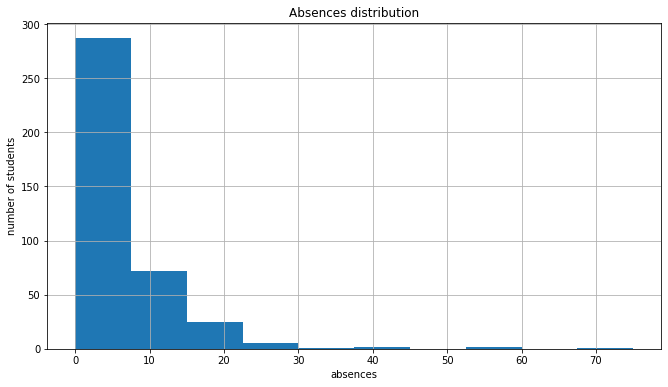

In [41]:
plt.figure(figsize=(11,6))
plt.title('Absences distribution')
data['absences'].hist()
plt.xlabel('absences')
plt.ylabel('number of students')
plt.show()

Посмотрим на среднее количество пропусков:

In [42]:
data['absences'].mean()

5.708860759493671

Итак, из гистограммы и полученного значения можно сделать вывод, что большинство студентов пропускает не так много занятий. Теперь посмотрим на влияние количества пропусков на итоговую оценку. Для этого разделим студентов на две части: те, у кого количество пропусков меньше среднего, и те, у кого оно не меньше среднего.

In [0]:
mean_absences = data['absences'].mean()
stud_few_absences = data[data['absences'] < mean_absences]
stud_many_absences = data[data['absences'] >= mean_absences]

Посмотрим, сколько получилось и тех, и других.

In [0]:
print('Students with few absences:', stud_few_absences.shape[0])
print('Students with many absences:', stud_many_absences.shape[0])

Students with few absences: 249
Students with many absences: 146


Посчитаем среднее значение целевой переменной для каждой части.

In [0]:
stud_few_absences_g3 = stud_few_absences['G3'].mean()
stud_many_absences_g3 = stud_many_absences['G3'].mean()
print('Students with few absences, mean G3:', stud_few_absences_g3)
print('Students with many absences, mean G3:', stud_many_absences_g3)

Students with few absences, mean G3: 10.168674698795181
Students with many absences, mean G3: 10.835616438356164


Итак, средние оценки примерно одинаковы - у тех, кто пропускал меньше занятий, она чуть хуже. Возможно, студенты, пропускавшие много занятий, знали материал очень хорошо :) Впрочем, подобное исследование не позволяет делать никаких серьезных выводов.

Также данные можно исследовать с помощью группировки и агрегирования. Например, найдем исследуем закономерности, связанные с разными школами. Сгруппируем объекты по школам:

In [52]:
data_by_school = data.groupby('school')
data_by_school.describe()

age                                                       Medu  \
        count       mean       std   min    25%   50%   75%   max  count   
school                                                                     
GP      349.0  16.521490  1.216610  15.0  16.00  16.0  17.0  22.0  349.0   
MS       46.0  18.021739  0.881643  17.0  17.25  18.0  18.0  21.0   46.0   

                  ...     G3          alc                                     \
            mean  ...    75%   max  count      mean       std  min       25%   
school            ...                                                          
GP      2.802292  ...  14.00  20.0  349.0  1.677446  0.903404  1.0  1.000000   
MS      2.347826  ...  12.75  19.0   46.0  1.978261  0.995667  1.0  1.285714   

                            
             50%  75%  max  
school                      
GP      1.285714  2.0  5.0  
MS      1.571429  2.5  5.0  

[2 rows x 136 columns]

Теперь посмотрим на среднее значение признаков для каждой школы:

In [0]:
data_by_school.mean()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alc
school,,,,,,,,,,,,,,,,,
GP,16.521490,2.802292,2.553009,1.386819,2.063037,0.318052,3.959885,3.223496,3.111748,1.444126,2.260745,3.575931,5.965616,10.939828,10.782235,10.489971,1.677446
MS,18.021739,2.347826,2.282609,1.913043,1.826087,0.456522,3.826087,3.326087,3.086957,1.760870,2.521739,3.391304,3.760870,10.673913,10.195652,9.847826,1.978261


Можно заметить, например, что в среднем до школы Mousinho da Silveira студентам нужно добираться дольше, чем до Gabriel Pereira. Интересно, что, несмотря на это, в среднем количество пропусков у них меньше.